## Interfaces, modèles et modularité 

Dans ce chapitre, nous plongerons profondément dans le domaine des modèles de conception à travers le prisme des interfaces, des modèles et de la modularité. Nous avons déjà abordé ce domaine lors de l'introduction du concept d'idiomes de programmation. Les idiomes peuvent être compris comme de petits modèles de programmation bien connus pour résoudre de petits problèmes. La principale caractéristique d'un idiome de programmation est qu'il est spécifique à un seul langage de programmation. Bien que les idiomes puissent souvent être portés dans un langage différent, il n'est pas garanti que le code résultant semblera naturel aux utilisateurs "natifs" de ce langage de programmation. 


Les idiomes concernent généralement de petites constructions de programmation, généralement quelques lignes de code. Les modèles de conception, d'un autre côté, traitent de structures de code beaucoup plus grandes - fonctions et classes. Ils sont aussi nettement plus omniprésents. Les modèles de conception sont des solutions réutilisables à de nombreux problèmes de conception courants apparaissant dans le génie logiciel. Ils sont souvent indépendants du langage et peuvent donc être exprimés à l'aide de nombreux langages de programmation.


 Dans ce chapitre, nous examinerons une approche assez inhabituelle du thème des modèles de conception. De nombreux livres de programmation commencent par remonter à l'origine officieuse des modèles de conception de logiciels - le livre Design Patterns: Elements of Reusable Object-Oriented Software de Gamma, Vlissides, Helm et Johnson. Ce qui suit généralement est un long catalogue de modèles de conception classiques avec des exemples plus ou moins idiomatiques de leur implémentation Python. Singletons, factories, adapters, yweights, bridges, visitors, strategies,, etc.

 Il existe également d'innombrables articles Web et blogs faisant exactement la même chose, donc si vous souhaitez apprendre les modèles de conception classiques, vous ne devriez pas avoir de problèmes pour trouver des ressources en ligne.


    Si vous souhaitez en savoir plus sur l'implémentation des modèles de
    conception "classiques" en Python, vous pouvez visiter le 
    site https://python-patterns.guide. Il fournit un catalogue complet de
    modèles de conception ainsi que des exemples de code Python.

Au lieu de cela, nous nous concentrerons sur deux "facilitateurs de modèles de conception" clés :

* Interfaces
* Inversion des injecteurs de contrôle et de dépendance

Ces deux concepts sont des "facilitateurs" car sans eux, nous n'aurions même pas de termes de langage appropriés pour parler de modèles de conception. En abordant le sujet des interfaces et de l'inversion de contrôle, nous pourrons mieux comprendre quels sont les enjeux de la construction d'applications modulaires. Et ce n'est qu'en comprenant profondément ces défis que nous pourrons comprendre pourquoi nous avons réellement besoin de modèles. Nous utiliserons bien sûr de nombreux modèles de conception classiques en cours de route, mais nous ne nous concentrerons sur aucun modèle spécifique.

## Interfaces

Au sens large, une interface est un intermédiaire qui participe à l'interaction entre deux entités. Par exemple, l'interface d'une voiture se compose principalement du volant, des pédales, du levier de vitesses, du tableau de bord, des boutons, etc. L'interface d'un ordinateur se compose traditionnellement d'une souris, d'un clavier et d'un écran. En programmation, l'interface peut signifier deux choses :

* La forme globale du plan d'interaction que le code peut avoir
* La définition abstraite des interactions possibles avec le code qui est intentionnellement séparé de sa mise en œuvre

Dans l'esprit du premier sens, l'interface est une combinaison spécifique de symboles utilisés pour interagir avec l'unité de code. L'interface d'une fonction, par exemple, sera le nom de cette fonction, ses arguments d'entrée et la sortie qu'elle renvoie. L'interface d'un objet sera l'ensemble de ses méthodes pouvant être invoquées et tous les attributs accessibles

Les collections d'unités de code (fonctions, objets, classes) sont souvent regroupées dans des bibliothèques. En Python, les bibliothèques prennent la forme de modules et de packages (collections de modules). Ils ont aussi des interfaces. Le contenu des modules et des packages peut généralement être utilisé dans diverses combinaisons et vous n'avez pas à interagir avec tout leur contenu. Cela en fait des applications programmables, et c'est pourquoi les interfaces des bibliothèques sont souvent appelées interfaces de programmation d'applications (API). 

Cette signification d'interface peut être étendue à d'autres éléments du monde informatique. Les systèmes d'exploitation ont des interfaces sous la forme de systèmes de fichiers et d'appels système. Les services Web et distants disposent d'interfaces sous la forme de protocoles de communication. 

Le deuxième sens d'interface peut être compris comme la formalisation du premier. Ici, l'interface est comprise comme un contrat qu'un élément spécifique du code déclare remplir. Une telle interface formelle peut être extraite de l'implémentation et peut vivre comme une entité autonome. Cela donne la possibilité de construire des applications qui dépendent d'une interface spécifique mais ne se soucient pas de l'implémentation réelle, tant qu'elle existe et remplit le contrat


Cette signification formelle d'interface peut également être étendue à des concepts de programmation plus larges : 

* Bibliothèques : le langage de programmation C définit l'API de sa bibliothèque standard, également connue sous le nom de bibliothèque ISO C. Contrairement à Python, la bibliothèque standard C a de nombreuses implémentations. Pour Linux, la plus courante est probablement la bibliothèque GNU C (glibc), mais elle a des alternatives comme dietlibc ou musl. D'autres systèmes d'exploitation sont livrés avec leurs propres implémentations de la bibliothèque ISO C.

* Système d'exploitation : L'interface de système d'exploitation portable (POSIX) est un ensemble de normes qui définissent une interface commune pour les systèmes d'exploitation. De nombreux systèmes sont certifiés conformes à cette norme (macOS et Solaris pour n'en nommer que quelques-uns). Il existe également des systèmes d'exploitation qui sont pour la plupart compatibles (Linux, Android, OpenBSD et bien d'autres). Au lieu d'utiliser le terme "conformité POSIX", nous pouvons dire que ces systèmes implémentent l'interface POSIX.

* Services Web : OpenID Connect (OIDC) est une norme ouverte d'authentification et un cadre d'autorisation basé sur le protocole OAuth 2.0. Les services qui souhaitent implémenter la norme OIDC doivent fournir des interfaces spécifiques bien définies décrites dans cette norme.


Les interfaces formelles sont un concept extrêmement important dans les langages de programmation orientés objet. Dans ce contexte, l'interface résume soit la forme soit le but de l'objet modélisé. Il décrit généralement une collection de méthodes et d'attributs qu'une classe devrait avoir à implémenter avec le comportement souhaité. 

Dans une approche puriste, la définition de l'interface ne fournit aucune implémentation utilisable des méthodes. Il définit simplement un contrat explicite pour toute classe qui souhaite implémenter l'interface. Les interfaces sont souvent composables. Cela signifie qu'une seule classe peut implémenter plusieurs interfaces à la fois. De cette façon, les interfaces sont la pierre angulaire des modèles de conception. 

Un modèle de conception unique peut être compris comme une composition d'interfaces spécifiques. Semblables aux interfaces, les modèles de conception n'ont pas d'implémentation inhérente. Ce ne sont que des échafaudages réutilisables permettant aux développeurs de résoudre des problèmes courants. . 

Par exemple, les créateurs d'une nouvelle implémentation d'interface obtiennent une liste claire des méthodes et des attributs qu'une classe donnée doit exposer. Avec une implémentation correcte, il est impossible d'oublier une méthode requise par une interface donnée


La prise en charge d'une interface abstraite est la pierre angulaire de nombreux langages à typage statique. Java, par exemple, a des traits qui sont des déclarations explicites qu'une classe implémente une interface spécifique. Cela permet aux programmeurs Java d'obtenir un polymorphisme sans héritage de type, ce qui peut parfois devenir problématique. Go, d'autre part, n'a pas de classes et n'offre pas d'héritage de type, mais les interfaces de Go permettent des modèles orientés objet sélectionnés et un polymorphisme sans héritage de type. Pour ces deux langages, les interfaces sont comme une version explicite du comportement de typage de canard - Java et Go utilisent des interfaces pour vérifier la sécurité du type au moment de la compilation, plutôt que d'utiliser le typage de canard pour lier les choses au moment de l'exécution. 

Python a une philosophie de typage complètement différente de celle-ci. langues, il n'a donc pas de support natif pour les interfaces vérifiées au moment de la compilation. Quoi qu'il en soit, si vous souhaitez avoir un contrôle plus explicite des interfaces d'application, vous avez le choix entre plusieurs solutions : 

* Utiliser un framework tiers comme zope.interface qui ajoute une notion d'interfaces 
* Utiliser des classes de base abstraites (ABC) 
* Tirer parti des annotations de frappe, du typing.Protocol et des analyseurs de type statiques

Nous examinerons attentivement chacune de ces solutions dans les sections suivantes.

## Un peu d'histoire : zope.interface

Il existe quelques frameworks qui permettent de construire des interfaces explicites en Python. Le plus notable fait partie du projet Zope. C'est le paquet zope.interface. Bien que, de nos jours, Zope ne soit plus aussi populaire qu'il y a dix ans, le package zope.interface est toujours l'un des principaux composants du framework Twisted toujours populaire. zope.interface est également l'un des frameworks d'interface les plus anciens et toujours actifs couramment utilisés en Python. Il est antérieur aux fonctionnalités Python courantes comme ABC, nous allons donc commencer par là et voir plus tard comment il se compare aux autres solutions d'interface.

Le concept d'interface fonctionne mieux pour les domaines où une seule abstraction peut avoir plusieurs implémentations ou peut être appliquée à différents objets qui ne devraient probablement pas être emmêlés avec la structure d'héritage. 

Pour mieux présenter cette idée, nous prendrons l'exemple d'un problème qui peut traiter différentes entités qui partagent certains traits communs mais ne sont pas exactement la même chose. objets. C'est quelque chose qui pourrait être utilisé dans un simple jeu ou une simulation. Notre solution sera plutôt triviale et inefficace. Rappelez-vous que le but ici est d'explorer le concept d'interfaces et non de construire un moteur de collision à l'épreuve des balles pour un jeu à succès. 

L'algorithme que nous utiliserons s'appelle Axis-Aligned Bounding Box (AABB). C'est un moyen simple de détecter une collision entre deux rectangles alignés sur l'axe (sans rotation). Il suppose que tous les éléments qui seront testés peuvent être contraints avec une boîte englobante rectangulaire. L'algorithme est assez simple et n'a besoin de comparer que quatre coordonnées rectangulaires :

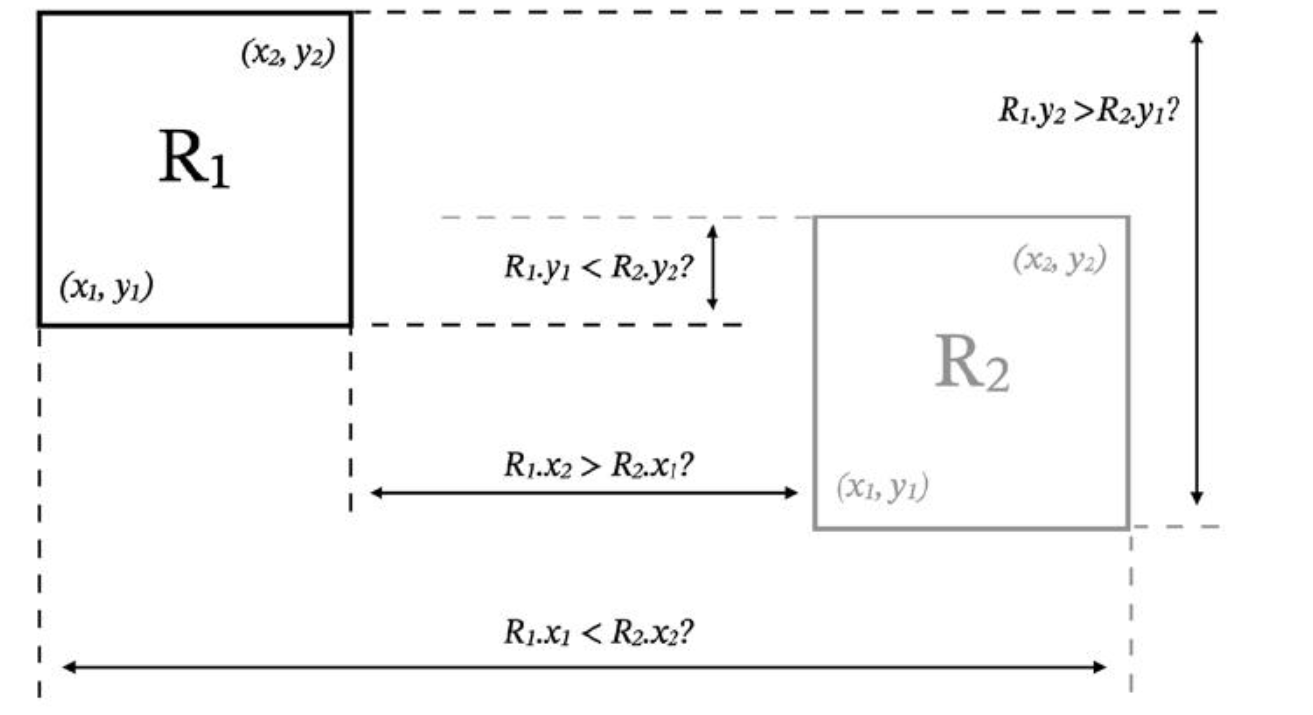

Nous allons commencer par une fonction simple qui vérifie si deux rectangles se chevauchent :

In [1]:
def rects_collide(rect1, rect2):    
  """Check collision between rectangles    
  Rectangle coordinates:        
      ┌─────(x2, y2)        
      │            │        
      (x1, y1) ────┘    
      """    
  return (        
      rect1.x1 < rect2.x2 and        
      rect1.x2 > rect2.x1 and        
      rect1.y1 < rect2.y2 and        
      rect1.y2 > rect2.y1    )

Nous n'avons défini aucune annotation de typage mais d'après le code ci-dessus, il devrait être clairement visible que nous nous attendons à ce que les deux arguments de la fonction rects_collide() aient quatre attributs : x1, y1, x2, y2. Celles-ci correspondent aux coordonnées des coins inférieur gauche et supérieur droit de la boîte englobante. Avec la fonction rects_collide(), nous pouvons définir une autre fonction qui détectera toutes les collisions dans un lot d'objets. Cela peut être aussi simple que suit :

In [2]:
import itertools

def find_collisions(objects):    
  return [        
          (item1, item2)        
          for item1, item2        
          in itertools.combinations(objects, 2)        
          if rects_collide(            
              item1.bounding_box,            
              item2.bounding_box        
              )    
          ]

Il reste à définir quelques classes d'objets qui peuvent être testés ensemble contre les collisions. Nous modéliserons différentes formes : un carré, un rectangle et un cercle. Chaque forme est différente et aura donc une structure interne différente. Il n'y a pas de classe sensée que l'on pourrait faire d'un ancêtre commun. Pour simplifier les choses, nous utiliserons des classes de données et des propriétés. Voici toutes les définitions initiales :

In [3]:
from dataclasses import dataclass


@dataclass
class Square:    
  x: float    
  y: float    
  size: float    
  
  
  @property    
  def bounding_box(self):        
    return Box(            
        self.x,            
        self.y,            
        self.x + self.size,            
        self.y + self.size        
        )

@dataclass
class Rect:    
  x: float    
  y: float    
  width: float    
  height: float    
  
  @property    
  def bounding_box(self):        
    return Box(            
        self.x,            
        self.y,            
        self.x + self.width,            
        self.y + self.height        
        )

@dataclass
class Circle:    
  x: float
  y: float   
  radius: float    
  
  @property    
  def bounding_box(self):        
    return Box(            
        self.x - self.radius,            
        self.y - self.radius,            
        self.x + self.radius,            
        self.y + self.radius        
        )

La seule chose commune à propos de ces classes (en plus d'être des classes de données) est la propriété bounding_box qui renvoie l'instance de la classe Box. La classe Box est également une classe de données :

In [4]:
@dataclass
class Box:    
  x1: float    
  y1: float    
  x2: float    
  y2: float

Les définitions des classes de données sont assez simples et ne nécessitent pas d'explication. Nous pouvons tester si notre système fonctionne en passant un tas d'instances à la fonction find_collisions() comme dans l'exemple suivant :

In [5]:
for collision in find_collisions([    
                                  Square(0, 0, 10),    
                                  Rect(5, 5, 20, 20),    
                                  Square(15, 20, 5),    
                                  Circle(1, 1, 2),]):
  print(collision)

(Square(x=0, y=0, size=10), Rect(x=5, y=5, width=20, height=20))
(Square(x=0, y=0, size=10), Circle(x=1, y=1, radius=2))
(Rect(x=5, y=5, width=20, height=20), Square(x=15, y=20, size=5))


tout va bien, mais faisons une expérience de pensée. Imaginez que notre application grandisse un peu et soit étendue avec des éléments supplémentaires. S'il s'agit d'un jeu, quelqu'un pourrait inclure des objets représentant des sprites, des acteurs ou des particules d'effet. Supposons que quelqu'un définit la classe Point suivante :

In [6]:
@dataclass
class Point:    
  x: float    
  y: float

Que se passerait-il si l'instance de cette classe était mise sur la liste des collisionneurs possibles ? Vous verriez probablement une trace d'exception semblable à la suivante :

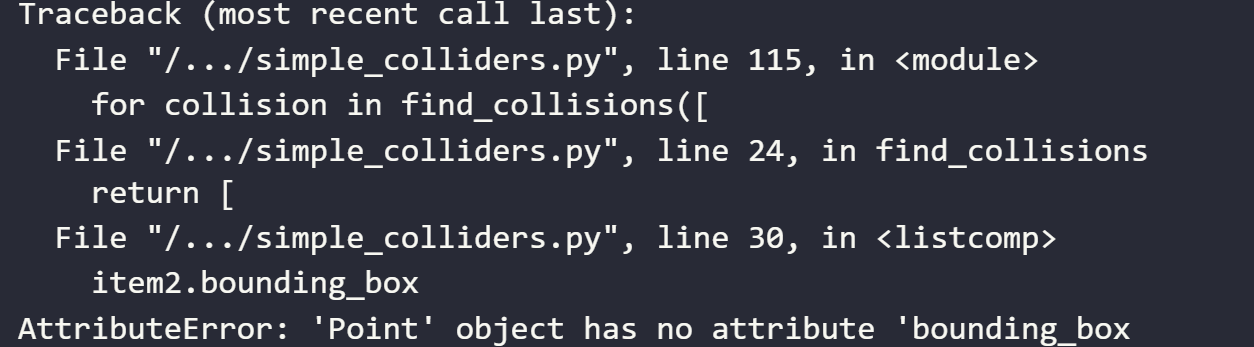

Cela donne une idée de la nature du problème. La question est de savoir si nous pourrions faire mieux et détecter ces problèmes plus tôt ? Nous pourrions au moins vérifier les fonctions find_collisions() de tous les objets d'entrée pour vérifier si elles sont collidables. Mais comment faire ? 

Parce qu'aucune des classes collidables ne partage un ancêtre commun, nous ne pouvons pas facilement utiliser la fonction isinstance() pour voir si leurs types correspondent. Nous pouvons vérifier l'attribut bounding_box en utilisant la fonction hasattr(), mais le faire assez profondément pour voir si cet attribut a la bonne structure nous conduirait à un code moche. C'est là que zope.interface est utile.

 La classe principale du paquet zope.interface est la classe Interface. Il vous permet de définir explicitement une nouvelle interface. Définissons une classe ICollidable qui sera notre déclaration de tout ce qui peut être utilisé dans notre système de collision :

In [ ]:
from zope.interface import Interface, Attribute

class ICollidable(Interface):    
  bounding_box = Attribute("Object's bounding box")

La convention courante pour Zope est de préfixer les classes d'interface avec I. Le constructeur Attribute dénote l'attribut désiré des objets implémentant l'interface. Toute méthode définie dans la classe d'interface sera utilisée comme déclaration de méthode d'interface. Ces méthodes doivent être vides. La convention courante est de n'utiliser que la docstring du corps de la méthode. 

Lorsque vous avez défini une telle interface, vous devez indiquer laquelle de vos classes concrètes implémente cette interface. Ce style d'implémentation d'interface est appelé interfaces explicites et est de nature similaire aux traits de Java. Pour désigner l'implémentation d'une interface spécifique, vous devez utiliser le décorateur de classe implementer(). Dans notre cas, cela ressemblera à ceci :

In [ ]:
from zope.interface import implementer

@implementer(ICollidable)
@dataclass
class Square:    
  ...
  
@implementer(ICollidable)
@dataclass
class Rect:    
  ...
  
  
@implementer(ICollidable)
@dataclass
class Circle:    
  ...

Il est courant de dire que l'interface définit un contrat qu'une implémentation concrète doit remplir. Le principal avantage de ce modèle de conception est de pouvoir vérifier la cohérence entre le contrat et la mise en œuvre avant l'utilisation de l'objet. Avec l'approche de type canard ordinaire, vous ne trouvez des incohérences que lorsqu'il manque un attribut ou une méthode à l'exécution.

Avec zope.interface, vous pouvez introspecter l'implémentation réelle à l'aide de deux méthodes du module zope.interface.verify pour trouver des incohérences dès le début : 

* verifyClass(interface, class_object) : cela vérifie l'existence de méthodes et l'exactitude de leurs signatures sans rechercher d'attributs. 
* verifyObject(interface, instance) : cela vérifie les méthodes, leurs signatures, ainsi que les attributs de l'instance réelle de l'objet.


Cela signifie que nous pouvons étendre la fonction find_collisions() pour effectuer une vérification initiale des interfaces d'objet avant un traitement ultérieur. Nous pouvons le faire comme suit :

In [ ]:
from zope.interface.verify import verifyObject

def find_collisions(objects):    
  for item in objects:        
    verifyObject(ICollidable, item)

Maintenant, si quelqu'un passe à la fonction find_collisions() une instance de la classe qui n'a pas le décorateur @implementer(ICollidable), il recevra une trace d'exception

## Utilisation d'annotations de fonctions et de classes de base abstraites

Les interfaces formelles sont destinées à permettre un couplage lâche dans les grandes applications, et non à vous fournir plus de couches de complexité. zope.interface est un excellent concept et peut grandement convenir à certains projets, mais ce n'est pas une solution miracle. En l'utilisant, vous pourriez bientôt passer plus de temps à résoudre des problèmes avec des interfaces incompatibles pour des classes tierces et à fournir des couches interminables d'adaptateurs au lieu d'écrire l'implémentation réelle. 

Si vous pensez cela, alors c'est un signe que quelque chose s'est mal passé. Heureusement, Python prend en charge la construction d'une alternative légère aux interfaces explicites. Ce n'est pas une solution complète comme zope.interface ou ses alternatives mais fournit généralement des applications plus flexibles. Vous devrez peut-être écrire un peu plus de code, mais au final, vous aurez quelque chose de plus extensible, qui gère mieux les types externes et peut-être plus à l'épreuve du futur. Notez que Python, à la base, n'a pas de notion explicite d'interfaces, et n'en aura probablement jamais, mais il a certaines des fonctionnalités qui permettent de construire quelque chose qui ressemble à la fonctionnalité des interfaces. Les fonctionnalités sont les suivantes :

* ABCs
* Annotations de fonction
* Annotations de type

Le cœur de notre solution est constitué de classes de base abstraites, nous les présenterons donc en premier. Comme vous le savez probablement, la comparaison directe de types est considérée comme nuisible et non Pythonique. Vous devez toujours éviter les comparaisons comme dans l'exemple suivant :

    assert type(instance) == list

La comparaison de types dans des fonctions ou des méthodes de cette manière interrompt complètement la possibilité de passer un sous-type de classe comme argument à la fonction. Une approche légèrement meilleure consiste à utiliser la fonction isinstance(), qui prendra en compte l'héritage :

    assert isinstance(instance, list)

L'avantage supplémentaire de l'isinstance() est que vous pouvez utiliser une plus grande gamme de types pour vérifier la compatibilité des types. Par exemple, si votre fonction s'attend à recevoir une sorte de séquence comme argument, vous pouvez la comparer à la liste des types de base :

    assert isinstance(instance, (list, tuple, range))

Et une telle vérification de compatibilité de type est correcte dans certaines situations mais n'est toujours pas parfaite. Cela fonctionnera avec n'importe quelle sous-classe de liste, de tuple ou de plage, mais échouera si l'utilisateur passe quelque chose qui se comporte exactement de la même manière que l'un de ces types de séquence mais n'hérite d'aucun d'eux. Par exemple, assouplissons nos exigences et disons que vous voulez accepter n'importe quel type d'itérable comme argument. Que feriez-vous ? 

La liste des types de base itérables est en fait assez longue. Vous devez couvrir la liste, le tuple, la plage, la chaîne, les octets, le dict, l'ensemble, les générateurs et bien plus encore. La liste des types intégrés applicables est longue, et même si vous les couvrez tous, cela ne permettra toujours pas de vérifier par rapport à la classe personnalisée qui définit la méthode \_\_iter__() mais hérite directement de l'objet.

 Et c'est le genre de situation où les ABC sont la bonne solution. ABC est une classe qui n'a pas besoin de fournir une implémentation concrète, mais définit à la place un plan d'une classe qui peut être utilisé pour vérifier la compatibilité des types. Ce concept est très similaire au concept de classes abstraites et de méthodes virtuelles connues dans le langage C++. 
 
 Les classes de base abstraites sont utilisées à deux fins :
 * Vérification de l'intégralité de l'implémentation
 * Vérification de la compatibilité implicite de l'interface

 L'utilisation des ABC est assez simple. Vous commencez par définir une nouvelle classe qui soit hérite de la classe de base abc.ABC, soit a abc.ABCMeta comme métaclasse. Nous n'aborderons pas les métaclasses avant le chapitre 8, Éléments de métaprogrammation, donc dans ce chapitre, nous n'utiliserons que l'héritage classique. Ce qui suit est un exemple d'une classe abstraite de base qui définit une interface qui ne fait pas quelque chose de particulièrement spécial :

In [ ]:
from abc import ABC, abstractmethod

class DummyInterface(ABC):    
  @abstractmethod    
  def dummy_method(self): 
    ...    
    
  @property    
  @abstractmethod    
  def dummy_property(self): 
    ...

Le décorateur @abstractmethod désigne une partie de l'interface qui doit être implémentée (par redéfinition) dans les classes qui sous-classeront notre ABC. Si une classe a une méthode ou une propriété non remplacée, vous ne pourrez pas l'instancier. Toute tentative de le faire entraînera une exception TypeError. 

Cette approche est un excellent moyen de garantir l'exhaustivité de l'implémentation et est aussi explicite que l'alternative zope.interface. Si nous souhaitons utiliser ABCs au lieu de zope.interface dans l'exemple de la section précédente, nous pourrions effectuer la modification suivante des définitions de classe :

In [13]:
from abc import ABC, abstractmethod
from dataclasses import dataclass

class ColliderABC(ABC):    
  @property    
  @abstractmethod    
  def bounding_box(self): 
    ...
    
@dataclass
class Square(ColliderABC):    
  ...

@dataclass
class Rect(ColliderABC):
  ...

@dataclass
class Circle(ColliderABC):    
  ...

Les corps et les propriétés des classes Square, Rect et Circle ne changent pas car l'essence de notre interface ne change pas du tout. Ce qui a changé, c'est la façon dont la déclaration explicite de l'interface est faite. Nous utilisons maintenant l'héritage au lieu du décorateur de classe zope.interface.implementer(). Si nous voulons toujours vérifier si l'entrée de find_collisions() est conforme à l'interface, nous devons utiliser la fonction isinstance(). Ce sera une modification assez simple :

In [14]:
def find_collisions(objects):    
  for item in objects:        
    if not isinstance(item, ColliderABC):            
      raise TypeError(f"{item} is not a collider")    
      ...

Nous avons dû utiliser des sous-classes pour que le couplage entre les composants soit un peu plus étroit mais toujours comparable à celui de zope.interface. Dans la mesure où nous nous appuyons sur des interfaces et non sur des implémentations concrètes (donc, ColliderABC au lieu de Square, Rect ou Circle), le couplage est toujours considéré comme lâche. 

Mais les choses pourraient être plus flexibles. C'est Python et nous avons un pouvoir d'introspection complet. Le typage de canard en Python nous permet d'utiliser n'importe quel objet qui « fait coin-coin comme un canard » comme s'il s'agissait d'un canard. Malheureusement, c'est généralement dans l'esprit de "essayer et voir". Nous supposons que l'objet dans le contexte donné correspond à l'interface attendue. Et tout le but des interfaces formelles était d'avoir un contrat que nous pouvons valider. Existe-t-il un moyen de vérifier si un objet correspond à l'interface sans essayer de l'utiliser au préalable ? 

Oui. Dans une certaine mesure. Les classes de base abstraites fournissent la méthode spéciale \_\_subclasshook__(cls). Il vous permet d'injecter votre propre logique dans la procédure qui détermine si l'objet est une instance d'une classe donnée. Malheureusement, vous devez fournir la logique par vous-même, car les créateurs d'abc ne voulaient pas contraindre les développeurs à remplacer l'ensemble du mécanisme isinstance(). Nous avons tous les pouvoirs dessus, mais nous sommes obligés d'écrire du code passe-partout. 

Bien que vous puissiez faire ce que vous voulez, la seule chose raisonnable à faire dans la méthode \_\_subclasshook__() est généralement de suivre le modèle commun. Afin de vérifier si la classe donnée est implicitement compatible avec la classe de base abstraite donnée, nous devrons vérifier si elle possède toutes les méthodes de la classe de base abstraite.

La procédure standard consiste à vérifier si l'ensemble des méthodes définies est disponible quelque part dans l'ordre de résolution des méthodes (MRO) de la classe donnée. Si nous souhaitons étendre notre interface ColliderABC avec un hook de sous-classe, nous pourrions procéder comme suit :

In [27]:
class ColliderABC(ABC):    
  @property    
  @abstractmethod    
  def bounding_box(self): 
    ...    
  @classmethod    
  def __subclasshook__(cls, C):        
    if cls is ColliderABC:           
      if any("bounding_box" in B.__dict__ for B in C.__mro__):               
        return True        
    return NotImplemented

Avec la méthode \_\_subclasshook__() définie de cette manière, ColliderABC devient une interface implicite. Cela signifie que tout objet sera considéré comme une instance de ColliderABC tant qu'il a la structure qui passe la vérification du crochet de sous-classe. Grâce à cela, nous pouvons ajouter de nouveaux composants compatibles avec l'interface ColliderABC sans en hériter explicitement. Voici un exemple de la classe Line qui serait considérée comme une sous-classe valide de ColliderABC :

In [16]:
@dataclass
class Line:    
  p1: Point    
  p2: Point    
  
  @property    
  def bounding_box(self):        
    return Box(            
        self.p1.x,            
        self.p1.y,            
        self.p2.x,            
        self.p2.y,        
        )

Comme vous pouvez le voir, la classe de données Line ne mentionne ColliderABC nulle part dans son code. Mais vous pouvez vérifier la compatibilité d'interface implicite des instances de Line en les comparant à ColliderABC à l'aide de la fonction isinstance() comme dans l'exemple suivant :

In [28]:
line = Line(Point(0, 0), Point(100, 100))
print(line.bounding_box)
isinstance(line, ColliderABC)

Box(x1=0, y1=0, x2=100, y2=100)


True

Nous avons travaillé avec des propriétés, mais la même approche peut également être utilisée pour les méthodes. Malheureusement, cette approche de la vérification de la compatibilité des types et de la complétude de l'implémentation ne prend pas en compte les signatures des méthodes de classe. Ainsi, si le nombre d'arguments attendus est différent dans l'implémentation, il sera toujours considéré comme compatible. Dans la plupart des cas, ce n'est pas un problème, mais si vous avez besoin d'un contrôle aussi précis sur les interfaces, le paquet zope.interface le permet. Comme déjà dit, la méthode \_\_subclasshook__() ne vous contraint pas à ajouter beaucoup plus de complexité à la logique de la fonction isinstance() pour atteindre un niveau de contrôle similaire

## L'utilisation de collections.abc

ABC est comme de petits blocs de construction pour créer un niveau d'abstraction plus élevé. Ils vous permettent d'implémenter des interfaces vraiment utilisables, mais sont très génériques et conçus pour gérer bien plus que ce modèle de conception unique. Vous pouvez libérer votre créativité et faire des choses magiques, mais construire quelque chose de générique et vraiment utilisable peut nécessiter beaucoup de travail qui ne rapportera peut-être jamais. 

La bibliothèque standard de Python et les types intégrés de Python englobent pleinement les classes de base abstraites. Le module collections.abc fournit de nombreux ABC prédéfinis qui permettent de vérifier la compatibilité des types avec les interfaces Python courantes. Avec les classes de base fournies dans ce module, vous pouvez vérifier, par exemple, si un objet donné est appelable, mappage ou s'il prend en charge l'itération. Les utiliser avec la fonction isinstance() est bien mieux que de comparer avec les types Python de base. Vous devez absolument savoir comment utiliser ces classes de base même si vous ne souhaitez pas définir vos propres interfaces personnalisées avec abc.ABC. 

Les classes de base abstraites les plus courantes de collections.abc que vous utiliserez assez souvent sont : 

* Conteneur : cette interface signifie que l'objet prend en charge l'opérateur in et implémente la méthode \_\_contains__().
*  Iterable : cette interface signifie que l'objet prend en charge l'itération et implémente la méthode \_\_iter__().
* Callable : cette interface signifie qu'il peut être appelée comme une fonction et implémente la méthode \_\_call__().

* Hashable : cette interface signifie que l'objet est hachable (c'est-à-dire qu'il peut être inclus dans des ensembles et en tant que clé dans des dictionnaires) et implémente la méthode \_\_hash__.
* Sized : cette interface signifie que l'objet a une taille (c'est-à-dire, il peut être un sujet de la fonction len()) et implémente la méthode \_\_len__().

Le module collections.abc montre assez bien où les ABC fonctionnent le mieux : créer des contrats pour de petits et simples protocoles d'objets. Ce ne seront pas de bons outils pour assurer commodément la structure à grain fin d'une grande interface. Ils ne sont pas non plus livrés avec des utilitaires qui vous permettraient de vérifier facilement les attributs ou d'effectuer une validation approfondie des arguments de fonction et des types de retour.Heureusement, il existe une solution complètement différente pour ce problème : l'analyse de type statique et le typage.Protocole taper

## Interfaces via les annotations de type

Les annotations de type en Python se sont avérées extrêmement utiles pour augmenter la qualité des logiciels. De plus en plus de programmeurs professionnels utilisent mypy ou d'autres outils d'analyse de type statique par défaut, laissant la programmation conventionnelle sans type pour les prototypes et les scripts jetables rapides. 

La prise en charge de la saisie dans la bibliothèque standard et les projets communautaires a considérablement augmenté ces dernières années. Grâce à cela, la flexibilité des annotations de typage augmente avec chaque version de Python. Il vous permet également d'utiliser des annotations de typage dans des contextes complètement nouveaux. 

L'un de ces contextes utilise des annotations de type pour effectuer un sous-typage structurel (ou un typage de canard statique). C'est simplement une autre approche du concept d'interfaces implicites. Il offre également des possibilités de vérification d'exécution simples et minimales dans l'esprit des crochets de sous-classe ABC. 

Le cœur du sous-typage structurel est le type typing.Protocol. En sous-classant ce type, vous pouvez créer une définition de votre interface. Voici un exemple d'interfaces de protocole de base que nous pourrions utiliser dans nos exemples précédents du système de détection de collision :

In [ ]:
from typing import Protocol, runtime_checkable

@runtime_checkable
class IBox(Protocol):    
  x1: float    
  y1: float    
  x2: float    
  y2: float
  
@runtime_checkable
class ICollider(Protocol):    
  @property    
  def bounding_box(self) -> IBox: ...

Cette fois, nous avons utilisé deux interfaces. Des outils comme mypy seront capables d'effectuer une vérification de type approfondie afin que nous puissions utiliser des interfaces supplémentaires pour augmenter la sécurité du type. Le décorateur @runtime_checkable étend la classe de protocole avec les vérifications isinstance(). C'est quelque chose que nous avons dû effectuer manuellement pour les ABC en utilisant les crochets de sous-classe dans la section précédente. Ici, c'est presque gratuit.

Pour tirer pleinement parti de l'analyse de type statique, nous devons également annoter le reste du code avec des annotations appropriées. Voici le code complet de vérification des collisions avec la validation de l'interface d'exécution basée sur les classes de protocole :

In [ ]:
import itertools
from dataclasses import dataclass
from typing import Iterable, Protocol, runtime_checkable

@runtime_checkable
class IBox(Protocol):    
  x1: float    
  y1: float    
  x2: float    
  y2: float

@runtime_checkable
class ICollider(Protocol):    
  @property    
  def bounding_box(self) -> IBox: ...
  
def rects_collide(rect1: IBox, rect2: IBox):    
  """Check collision between rectangles    
  Rectangle coordinates:        
  ┌───(x2, y2)        
  │         │      
  (x1, y1)──┘    
  """    
  return (        
      rect1.x1 < rect2.x2 and        
      rect1.x2 > rect2.x1 and        
      rect1.y1 < rect2.y2 and        
      rect1.y2 > rect2.y1    
      )
  
def find_collisions(objects: Iterable[ICollider]):    
  for item in objects:        
    if not isinstance(item, ICollider):            
      raise TypeError(f"{item} is not a collider")    
    return [        
            (item1, item2)        
            for item1, item2        
            in itertools.combinations(objects, 2)        
            if rects_collide(            
                item1.bounding_box,            
                item2.bounding_box        
                )    
            ]


Nous n'avons pas inclus le code des classes Rect, Square et Circle, car leur implémentation n'a pas à changer. Et c'est la vraie beauté des interfaces implicites : il n'y a pas de déclaration d'interface explicite dans une classe concrète au-delà de l'interface inhérente qui vient de l'implémentation réelle.

En fin de compte, nous pourrions utiliser n'importe laquelle des itérations précédentes des classes Rect, Square et Circle (classes de données simples, classes déclarées zope ou descendants ABC). Ils fonctionneraient tous avec un sous-typage structurel via la classe typing.Protocol. des moyens de standardiser les contrats de classes, de méthodes et de fonctions. Cette capacité devient vraiment utile lors de la mise en œuvre de divers modèles de conception pour résoudre des problèmes de programmation courants.

 Les modèles de conception sont une question de réutilisabilité et l'utilisation d'interfaces peut aider à les structurer en modèles de conception qui peuvent être réutilisés encore et encore. Mais l'utilisation d'interfaces (et de solutions analogues) ne s'arrête pas aux modèles de conception. La capacité à créer un contrat bien défini et vérifiable pour une seule unité de code (fonction, classe ou méthode) est également un élément crucial des paradigmes et techniques de programmation spécifiques. 
 
 Des exemples notables sont l'inversion de contrôle et l'injection de dépendances. Ces deux concepts sont étroitement liés, nous en discuterons donc ensemble dans la section suivante.

## Inversion de contrôle et injection de dépendan

ces L'inversion de contrôle (IoC) est une propriété simple de certaines conceptions de logiciels. Selon le Wiktionnaire, si une conception présente un IoC, cela signifie que :

      (…) le fux de contrôle dans un système est inversé par rapport à l'architecture traditionnelle


Mais qu'est-ce que l'architecture traditionnelle ? IoC n'est pas une idée nouvelle, et nous pouvons la faire remonter au moins à l'article de David D. Clark de 1985 intitulé La structuration des systèmes utilisant des rappels. Cela signifie que la conception traditionnelle fait probablement référence à la conception de logiciels qui était courante ou considérée comme traditionnelle dans les années 1980.


Clark décrit l'architecture traditionnelle d'un programme comme une structure en couches de procédures où le contrôle va toujours de haut en bas. Les couches de niveau supérieur appellent les procédures des couches inférieures

Ces procédures invoquées prennent le contrôle et peuvent invoquer des procédures encore plus profondes avant de rendre le contrôle vers le haut. En pratique, le contrôle est traditionnellement passé de l'application aux fonctions de la bibliothèque. Les fonctions de bibliothèque peuvent le transmettre plus profondément à des bibliothèques de niveau encore inférieur mais, éventuellement, le renvoyer à l'application. IoC se produit lorsqu'une bibliothèque passe le contrôle à l'application afin que l'application puisse participer au comportement de la bibliothèque. Pour mieux comprendre ce concept, considérons l'exemple trivial suivant de tri d'une liste de nombres entiers :

In [1]:
sorted([1,2,3,4,5,6])

[1, 2, 3, 4, 5, 6]

La fonction intégrée sorted() prend un itérable d'éléments et renvoie une liste d'éléments triés. Le contrôle va de l'appelant (votre application) directement à la fonction sorted(). Lorsque la fonction sorted() est terminée avec le tri, elle renvoie simplement le résultat trié et redonne le contrôle à l'appelant. Rien de spécial. 

Maintenant, disons que nous voulons trier nos numéros d'une manière assez inhabituelle. Cela pourrait être, par exemple, les trier par la distance absolue du nombre 3. Les entiers les plus proches de 3 doivent être au début de la liste des résultats et les plus éloignés doivent être à la fin. Nous pouvons le faire en définissant une fonction clé simple qui spécifiera la clé d'ordre de nos éléments :

In [2]:
def distance_from_3(item):    
  return abs(item - 3)

Nous pouvons maintenant passer cette fonction comme argument de clé de rappel à la fonction triée() :

In [3]:
sorted([1,2,3,4,5,6], key=distance_from_3)

[3, 2, 4, 1, 5, 6]

Ce qui va se passer maintenant, c'est que la fonction sorted() invoquera la fonction clé sur chaque élément de l'argument itérable. Au lieu de comparer les valeurs des éléments, il comparera désormais les valeurs de retour de la fonction clé. C'est ici que l'IoC se produit. La fonction sorted() "rappelle" la fonction distance_from_3() fournie par l'application en tant qu'argument. Maintenant c'est une bibliothèque qui appelle les fonctions depuis l'application, et donc le flux de contrôle est inversé.

Notez que IoC n'est qu'une propriété d'une conception et non un modèle de conception en soi. Un exemple avec la fonction sorted() est l'exemple le plus simple d'IoC basé sur le rappel, mais il peut prendre de nombreuses formes différentes. Par exemple :

* Polymorphisme : lorsqu'une classe personnalisée hérite d'une classe de base et que les méthodes de base sont censées appeler des méthodes personnalisées

* Passage d'arguments : lorsque la fonction réceptrice est censée appeler les méthodes de l'objet fourni
* Décorateurs : lorsqu'une fonction décoratrice appelle un fonction décorée
*  Fermetures : lorsqu'une fonction imbriquée appelle une fonction en dehors de sa portée

Comme vous le voyez, IoC est un aspect assez courant des paradigmes de programmation orientés objet ou fonctionnels. Et cela arrive aussi assez souvent sans même que vous vous en rendiez compte. Bien qu'il ne s'agisse pas d'un modèle de conception en soi, il s'agit d'un élément clé de nombreux modèles de conception, paradigmes et méthodologies réels. Le plus notable est l'injection de dépendances, dont nous parlerons plus tard dans ce chapitre. 

Le flux de contrôle traditionnel de Clark en programmation procédurale se produit également en programmation orientée objet. Dans les programmes orientés objet, les objets eux-mêmes sont les récepteurs du contrôle. Nous pouvons dire que le contrôle est passé à l'objet chaque fois qu'une méthode de cet objet est invoquée. Ainsi, le flux de contrôle traditionnel exigerait que les objets détiennent la pleine propriété de tous les objets dépendants nécessaires pour remplir le comportement de l'objet.

## Inversion de contrôle dans les applications 

Pour mieux illustrer les différences entre les différents flux de contrôle, nous allons construire une application petite mais pratique. Il commencera initialement par un flux de contrôle traditionnel et plus tard, nous verrons s'il peut bénéficier de l'IoC dans des endroits sélectionnés. 

Notre cas d'utilisation sera assez simple et courant. Nous allons créer un service capable de suivre les vues de pages Web à l'aide de ce que l'on appelle des pixels de suivi et de fournir des statistiques de vues de pages sur un point de terminaison HTTP. Cette technique est couramment utilisée pour suivre les vues des publicités ou les ouvertures des e-mails. 

Cela peut également être utile dans les situations où vous faites un usage intensif de la mise en cache HTTP et que vous souhaitez vous assurer que la mise en cache n'affecte pas les statistiques de consultation des pages. Notre application devra suivre le nombre de consultations de pages dans un stockage persistant. Cela nous donnera également l'opportunité d'explorer la modularité des applications, une caractéristique qui ne peut pas être mise en œuvre sans IoC.


Ce que nous devons construire est une petite application web backend qui aura deux points de terminaison : 

* /track : ce point de terminaison renverra une réponse HTTP avec une image GIF de 1 x 1 pixel. Sur demande, il stockera l'en-tête Referer et augmentera le nombre de requêtes associées à cette valeur. 
* /stats : ce point de terminaison lira les 10 valeurs de référence les plus courantes reçues sur le track/endpoint et renverra une réponse HTTP contenant un résumé de les résultats au format JSON.

Nous avons déjà présenté Flask en tant que microframework Web simple au chapitre 2, Environnements de développement Python modernes, nous l'utiliserons donc également ici. Commençons par importer quelques modules et paramétrer les variables de modules que nous utiliserons au passage :

In [ ]:
from collections import Counter
from http import HTTPStatus
from flask import Flask, request, Response

app = Flask(__name__)
storage = Counter()

PIXEL = (    
    b'GIF89a\x01\x00\x01\x00\x80\x00\x00\x00'    
    b'\x00\x00\xff\xff\xff!\xf9\x04\x01\x00'    
    b'\x00\x00\x00,\x00\x00\x00\x00\x01\x00'    
    b'\x01\x00\x00\x02\x01D\x00;'
    )

La variable app est l'objet central du framework Flask. Il représente une application Web Flask. Nous l'utiliserons plus tard pour enregistrer les routes de point de terminaison et exécuter également le serveur de développement d'applications.

La variable de storage contient une instance Counter. Il s'agit d'une structure de données pratique de la bibliothèque standard qui vous permet de suivre les compteurs de toutes les valeurs immuables. Notre objectif ultime est de stocker les statistiques de pages vues de manière persistante, mais il sera beaucoup plus facile de commencer avec quelque chose de plus simple. C'est pourquoi nous utiliserons initialement cette variable comme stockage en mémoire des statistiques de consultation des pages. 

Le dernier mais non le moindre est la variable PIXEL. Il contient une représentation en octets d'une image GIF transparente 1x1. L'aspect visuel réel du pixel de suivi n'a pas d'importance et ne changera probablement jamais. Il est aussi si petit qu'il n'y a pas besoin de s'embêter à le charger depuis le système de fichiers. C'est pourquoi nous l'intégrons dans notre module pour intégrer l'ensemble de l'application dans un seul module Python. Une fois que nous sommes définis, nous pouvons écrire du code pour le gestionnaire de points de terminaison /track :

In [ ]:
@app.route('/track')
def track():    
  try:        
    referer = request.headers["Referer"]    
  except KeyError:        
    return Response(status=HTTPStatus.BAD_REQUEST)    
  storage[referer] += 1    
  return Response(        
      PIXEL, headers={            
          "Content-Type": "image/gif",            
          "Expires": "Mon, 01 Jan 1990 00:00:00 GMT",            
          "Cache-Control": "no-cache, no-store, must-revalidate",            
          "Pragma": "no-cache",        
          }    
          )

Les gestionnaires de requêtes Flask commencent généralement par le décorateur @app.route(route) qui enregistre la fonction de gestionnaire suivante pour la route HTTP donnée. Les gestionnaires de requêtes sont également appelés vues. Ici, nous avons enregistré la vue track() en tant que gestionnaire du point de terminaison de route /track. Il s'agit de la première occurrence d'IoC dans notre application : nous enregistrons notre propre implémentation de gestionnaire dans les frameworks Flask. C'est un framework qui rappellera nos gestionnaires sur les requêtes entrantes qui correspondent aux routes associées. 


Après la signature, nous avons un code simple pour gérer la requête. Nous vérifions si la requête entrante a l'en-tête Referer attendu. C'est la valeur que le navigateur utilise pour indiquer sur quel URI la ressource demandée a été incluse (par exemple, la page HTML que nous voulons suivre). S'il n'y a pas un tel en-tête, nous renverrons une réponse d'erreur avec un code d'état HTTP 400 Bad Request. 

Si la demande entrante a l'en-tête Referer, nous augmenterons la valeur du compteur dans la variable de stockage. La structure Counter a une interface de type dict et vous permet de modifier facilement les valeurs de compteur pour les clés qui n'ont pas encore été enregistrées. Dans un tel cas, il supposera que la valeur initiale de la clé donnée était 0. De cette façon, nous n'avons pas besoin de vérifier si une valeur spécifique de Referer a déjà été vue et cela simplifie grandement le code. 

Après avoir augmenté la valeur du compteur, nous renvoyons une réponse pixel qui peut être finalement affichée par le navigateur. Notez que bien que la variable de storage soit définie en dehors de la fonction track(), ce n'est pas encore un exemple d'IoC. C'est parce que celui qui appelle la fonction stats() ne peut pas remplacer l'implémentation du stockage. Nous essaierons de changer cela dans les prochaines itérations de notre application. Le code du point de terminaison /stats est encore plus simple :

In [ ]:
@app.route('/stats')def stats():    
  return dict(storage.most_common(10))

Dans la vue stats(), nous profitons à nouveau de l'interface pratique de l'objet Counter. Il fournit la méthode most_common(n), qui renvoie jusqu'à n paires clé-valeur les plus courantes stockées dans la structure. Nous le convertissons immédiatement en dictionnaire. Nous n'utilisons pas la classe Response, car Flask sérialise par défaut les valeurs de retour de la classe non-Response en JSON et suppose un statut 200 OK pour la réponse HTTP.

Afin de tester facilement notre application, nous terminons notre script avec le simple appel du serveur de développement intégré :

In [ ]:
if __name__ == '__main__':    
  app.run(host="0.0.0.0", port=8000)

Si vous stockez l'application dans le fichier tracking.py, vous pourrez démarrer le serveur à l'aide de la commande python tracking.py. Il commencera à écouter sur le port 8000. Si vous souhaitez tester l'application dans votre propre navigateur, vous pouvez l'étendre avec le gestionnaire de point de terminaison suivant :

In [ ]:
@app.route('/test')
def test():    
  return """    
  <html>    
  <head></head>    
  <body><img src="/track"></body>    
  </html>    
  """

Si vous ouvrez l'adresse http://localhost:8000/test plusieurs fois dans votre navigateur Web, puis accédez à http://localhost:8000/stats, vous verrez une sortie semblable à celle-ci :

    {"http://localhost:8000/test":6}

Le problème avec l'implémentation actuelle est qu'elle stocke les compteurs de requêtes en mémoire. Chaque fois que l'application est redémarrée, les compteurs existants seront réinitialisés et nous perdrons des données importantes. Afin de conserver les données entre les redémarrages, nous devrons remplacer notre implémentation de stockage. 

Les options pour assurer la persistance des données sont nombreuses. Nous pourrions, par exemple, utiliser :

* Un simple fichier texte
* Le module d'étagère intégré
* Un système de gestion de base de données relationnelle (RDBMS) comme MySQL, MariaDB ou PostgreSQL
* Un service de stockage de clé-valeur ou de structure de données en mémoire comme Memcached ou Redis

Selon le contexte et l'ampleur de la charge de travail que notre application doit gérer, la meilleure solution sera différente. Si nous ne savons pas encore quelle est la meilleure solution, nous pouvons également rendre le stockage enfichable afin de pouvoir changer de backend de stockage en fonction des besoins réels de l'utilisateur. Pour ce faire, nous devrons inverser le flux de contrôle dans nos fonctions track() et stats().


Une bonne conception dicte la préparation d'une sorte de définition de l'interface de l'objet qui est responsable de l'IoC. L'interface de la classe Counter semble être un bon point de départ. Il est pratique à utiliser. Le seul problème est que l'opération += peut être implémentée via la méthode spéciale \_\_add__() ou \_\_iadd__(). Nous voulons absolument éviter une telle ambiguïté. De plus, la classe Counter a beaucoup trop de méthodes supplémentaires et nous n'en avons besoin que de deux :

* Une méthode qui vous permet d'augmenter la valeur du compteur d'un
* Une méthode qui vous permet de récupérer les 10 clés les plus souvent demandées

Pour garder les choses simples et lisibles , nous définirons notre interface de stockage de vues comme une classe de base abstraite de la forme suivante :

In [ ]:
from abc import ABC, abstractmethod
from typing import Dict

class ViewsStorageBackend(ABC):    
  @abstractmethod    
  def increment(self, key: str): ...    
  
  @abstractmethod    
  def most_common(self, n: int): Dict[str, int] ...

À partir de maintenant, nous pouvons fournir diverses implémentations du backend de stockage des vues. Voici l'implémentation qui adapte la classe Counter précédemment utilisée dans l'interface ViewsStorageBackend :

In [ ]:
from collections import Counter
from typing import Dictfrom .tracking_abc import ViewsStorageBackend

class CounterBackend(ViewsStorageBackend):    
  def __init__(self):        
    self._counter = Counter()    
  
  def increment(self, key: str):        
    self._counter[key] += 1    
  
  def most_common(self, n: int) -> Dict[str, int]:        
    return dict(self._counter.most_common(n))

Si nous souhaitons assurer la persistance via le service de stockage en mémoire Redis, nous pouvons le faire en implémentant un nouveau backend de stockage comme suit :

In [ ]:
from typing import Dict
from redis import Redis

class RedisBackend(ViewsStorageBackend):    
  def __init__(        
      self,        
      redis_client: Redis,        
      set_name: str    
      ):        
      
      self._client = redis_client        
      self._set_name = set_name    
    
  def increment(self, key: str):        
    self._client.zincrby(self._set_name, 1, key)    
  
  def most_common(self, n: int) -> Dict[str, int]:        
      return {            
          key.decode(): int(value)            
          for key, value in            
          self._client.zrange(                
              self._set_name, 0, n-1,                
              desc=True,                
              withscores=True,            
              )        
          }

Les deux backends ont la même interface faiblement appliquée avec une classe de base abstraite. Cela signifie que les instances des deux classes peuvent être utilisées de manière interchangeable. La question est, comment allons-nous inverser le contrôle de nos fonctions track() et stats() d'une manière qui nous permettra de brancher une implémentation de stockage de vues différente ? Rappelons-nous les signatures de nos fonctions :

In [ ]:
@app.route('/stats')
def stats():   
  ...

@app.route('/track')
def track():   
  ...

Dans le framework Flask, le décorateur app.route() enregistre une fonction en tant que gestionnaire de route spécifique. Vous pouvez le considérer comme un rappel pour les chemins de requête HTTP. Vous n'appelez plus cette fonction manuellement et Flask contrôle totalement les arguments qui lui sont transmis.

 Mais nous voulons pouvoir remplacer facilement l'implémentation du stockage. Une façon de le faire serait de reporter l'enregistrement du gestionnaire et de laisser nos fonctions recevoir un argument de storage supplémentaire. Considérez l'exemple suivant :

In [ ]:
def track(storage: ViewsStorageBackend):    
  try:        
    referer = request.headers["Referer"]    
  except KeyError:        
    return Response(status=HTTPStatus.BAD_REQUEST)    
  storage.increment(referer)    
  return Response(        
      PIXEL, headers={            
          "Content-Type": "image/gif",            
          "Expires": "Mon, 01 Jan 1990 00:00:00 GMT",            
          "Cache-Control": "no-cache, no-store, must-revalidate",            
          "Pragma": "no-cache",        
          }    
          )
  
def stats(storage: ViewsStorageBackend):    
  return storage.most_common(10)

Notre argument supplémentaire est annoté avec le type ViewsStorageBackend afin que le type puisse être facilement vérifié avec un IDE ou des outils supplémentaires. Grâce à cela, nous avons inversé le contrôle de ces fonctions et également atteint une meilleure modularité. Désormais, vous pouvez facilement changer l'implémentation du stockage pour différentes classes avec une interface compatible. L'avantage supplémentaire d'IoC est que nous pouvons facilement tester les méthodes stats() et track() indépendamment des implémentations de stockage.

La seule partie qui manque est l'enregistrement de l'itinéraire réel. Nous ne pouvons plus utiliser le décorateur app.route() directement sur nos fonctions. En effet, Flask ne pourra pas résoudre seul l'argument de storage. Nous pouvons surmonter ce problème en "pré-injectant" les implémentations de stockage souhaitées dans les fonctions de gestionnaire et en créant de nouvelles fonctions qui peuvent être facilement enregistrées avec l'appel app.route(). 

La façon simple de le faire serait d'utiliser la fonction partial() de le module functools. Il prend une seule fonction avec un ensemble d'arguments et d'arguments de mots clés et renvoie une nouvelle fonction qui a sélectionné des arguments préconfigurés. Nous pouvons utiliser cette approche pour préparer diverses configurations de notre service. Voici, par exemple, une configuration d'application qui utilise Redis comme backend de stockage :

In [ ]:
from functools import partial

if __name__ == '__main__':    
  
  views_storage = RedisBackend(Redis(host="redis"), "my-stats")    
  
  app.route("/track", endpoint="track")(        
      partial(track, storage=views_storage))    
  
  app.route("/stats", endpoint="stats")(        
      partial(stats, storage=views_storage))    
  
  app.run(host="0.0.0.0", port=8000)

L'approche présentée peut être appliquée à de nombreux autres frameworks Web car la majorité d'entre eux ont la même structure route-to-handler. Cela fonctionnera particulièrement bien pour les petits services avec seulement une poignée de points de terminaison. Malheureusement, il peut ne pas bien évoluer dans les grandes applications. Il est simple à écrire mais certainement pas le plus facile à lire. 

Les programmeurs chevronnés de Flask auront certainement l'impression que cette approche n'est pas naturelle et inutilement répétitive. Ici, cela rompt simplement la convention courante d'écriture des fonctions du gestionnaire Flask.

La solution ultime serait celle qui vous permet d'écrire et d'enregistrer des fonctions de vue sans avoir besoin d'injecter manuellement des objets dépendants. Ainsi, par exemple :

In [ ]:
@app.route('/track')
def track(storage: ViewsStorageBackend):   
  ...

Pour ce faire, à partir du framework Flask, nous aurions besoin de :

* Reconnaître les arguments supplémentaires comme des dépendances de vues.
* Autoriser la définition d'une implémentation par défaut pour lesdites dépendances.

* Résoudre automatiquement les dépendances et les injecter dans les vues au moment de l'exécution. 

Un tel mécanisme est appelé injection de dépendances, que nous avons mentionné précédemment. Certains frameworks Web offrent un mécanisme d'injection de dépendances intégré, mais dans l'écosystème Python, c'est plutôt rare. Heureusement, il existe de nombreuses bibliothèques d'injection de dépendances légères qui peuvent être ajoutées à n'importe quel framework Python. Nous explorerons une telle possibilité dans la section suivante.

## Utilisation de frameworks d'injection de dépendances

Lorsque l'IoC est utilisé à grande échelle, cela peut facilement devenir écrasant. L'exemple de la section précédente était assez simple et ne nécessitait donc pas beaucoup de configuration. Malheureusement, nous avons sacrifié un peu de lisibilité et d'expressivité pour une meilleure modularité et isolation des responsabilités. 

Pour les applications plus volumineuses, cela peut être un problème sérieux. Les bibliothèques d'injection de dépendances dédiées viennent à la rescousse en combinant un moyen simple de marquer les dépendances de fonction ou d'objet avec une résolution de dépendance d'exécution. 

Tout cela peut généralement être réalisé avec un impact minimal sur la structure globale du code. Il existe de nombreuses bibliothèques d'injection de dépendances pour Python, il n'est donc absolument pas nécessaire de créer la vôtre à partir de zéro. Ils sont souvent similaires dans leur implémentation et leurs fonctionnalités, nous allons donc simplement en choisir un et voir comment il pourrait être appliqué dans notre application de suivi des vues. Notre bibliothèque de choix sera la bibliothèque injection , qui est disponible gratuitement sur PyPI. Nous l'adopterons pour plusieurs raisons :

* Raisonnablement actif et mature : développé sur plus de 10 ans avec des versions tous les quelques mois.

* Prise en charge du framework : il dispose d'un support communautaire pour divers frameworks, y compris Flask via le package flask-injector.
* Prise en charge des annotations de typage : il permet d'écrire des annotations de dépendance discrètes et de tirer parti de l'analyse de typage statique. 

* Simple : l'injecteur dispose d'une API Pythonic. Cela rend le code facile à lire et à raisonner.



Dans notre exemple, nous utiliserons le package flask-injector car il fournit un passe-partout initial pour intégrer l'injecteur à Flask de manière transparente. Mais avant cela, nous allons d'abord séparer notre application en plusieurs modules qui simuleraient mieux une application plus large. Après tout, l'injection de dépendances brille vraiment dans les applications qui ont plusieurs composants. 

Nous allons créer les modules Python suivants : 

* interfaces : ce sera le module contenant nos interfaces. Il contiendra ViewsStorageBackend de la section précédente sans aucun changement. 

* backends : ce sera le module contenant les implémentations spécifiques des backends de stockage. Il contiendra CounterBackend et RedisBackend de la section précédente sans aucun changement. 

* tracking : ce sera le module contenant la configuration de l'application avec les fonctions d'affichage. 

* di : ce sera le module contenant les définitions pour la bibliothèque d'injecteurs, qui lui permettre de résoudre automatiquement les dépendances. 


Le cœur de la bibliothèque d'injecteurs est une classe Module. Il définit un soi-disant conteneur d'injection de dépendances - un bloc atomique de mappage entre les interfaces de dépendance et leurs instances d'implémentation réelles. La sous-classe minimale de Module peut ressembler à ceci :

In [ ]:
from injector import Module, provider



def MyModule(Module):
  @provider    
  def provide_dependency(self, *args) -> Type:        
    return ...

Le décorateur @provider marque une méthode Module comme une méthode fournissant l'implémentation d'une interface Type particulière. La création de certains objets peut être complexe, donc l'injecteur permet aux modules d'avoir des méthodes d'assistance supplémentaires non décorées. 

La méthode qui fournit la dépendance peut également avoir ses propres dépendances. Ils sont définis comme des arguments de méthode avec des annotations de type. Cela permet une résolution de dépendance en cascade. L'injecteur prend en charge la composition du contexte d'injection de dépendances à partir de plusieurs modules, il n'est donc pas nécessaire de définir toutes les dépendances dans un seul module. 

En utilisant le modèle ci-dessus, nous pouvons créer notre premier module d'injection dans le fichier di.py. Ce sera CounterModule, qui fournit une implémentation CounterBackend pour l'interface ViewsStorageBackend. La définition sera la suivante :

In [ ]:
from injector import Module, provider, singletonfrom interfaces 
import ViewsStorageBackendfrom backends import CounterBackend

class CounterModule(Module):    
  @provider    
  @singleton    
  def provide_storage(self) -> ViewsStorageBackend:        
    return CounterBackend()

CounterStorage ne prend aucun argument, nous n'avons donc pas à définir de dépendances supplémentaires. La seule différence avec le modèle de module général est le décorateur @singleton. Il s'agit d'une implémentation explicite du modèle de conception singleton. Un singleton est simplement une classe qui ne peut avoir qu'une seule instance. Dans ce contexte, cela signifie que chaque fois que cette dépendance est résolue, l'injecteur renverra toujours le même objet. Nous en avons besoin car CounterStorage stocke les compteurs de vues sous l'attribut interne _counter. Sans le décorateur @singleton, chaque demande d'implémentation de ViewsStorageBackend renverrait un objet complètement nouveau et nous perdrions donc constamment la trace des numéros de vue.

 L'implémentation de RedisModule ne sera que légèrement plus complexe :

In [ ]:
from injector import Module, provider, singleton
from redis import Redis
from interfaces  import ViewsStorageBackend
from backends import RedisBackend


class RedisModule(Module):    
  @provider    
  def provide_storage(self, client: Redis) -> ViewsStorageBackend:        
    return RedisBackend(client, "my-set")    
  
  @provider    
  @singleton    
  def provide_redis_client(self) -> Redis:        
    return Redis(host="redis")

Dans le module RedisStorage, nous profitons de la capacité de la bibliothèque d'injecteurs à résoudre les dépendances en cascade. Le constructeur RedisBackend nécessite une instance de client Redis afin que nous puissions la traiter comme un autre argument de la méthode provide_storage(). L'injecteur reconnaîtra l'annotation de frappe et correspondra automatiquement à la méthode qui fournit l'instance de classe Redis. 

Nous pourrions aller encore plus loin et extraire un argument d'hôte pour séparer les dépendances de configuration. Nous ne le ferons pas par souci de simplicité. Maintenant, nous devons tout lier dans le module de suivi. Nous nous appuierons sur l'injecteur pour résoudre les dépendances sur les vues. Cela signifie que nous pouvons enfin définir les gestionnaires track() et stats() avec des arguments de stockage supplémentaires et les enregistrer avec le décorateur @app.route() comme s'il s'agissait de vues Flask normales. Les signatures mises à jour seront les suivantes :

In [ ]:
@app.route('/stats')
def stats(storage: ViewsStorageBackend):   
  ...
  
@app.route('/track')
def track(storage: ViewsStorageBackend):   
  ...

Ce qui reste est la configuration finale de l'application qui désigne les modules à utiliser pour fournir des implémentations d'interface. Si nous souhaitons utiliser RedisBackend, nous terminerions notre module de suivi avec le code suivant :

In [ ]:
import di

if __name__ == '__main__':    
  FlaskInjector(app=app, modules=[di.RedisModule()])    
  app.run(host="0.0.0.0", port=8000)

Voici le code complet du module de suivi :

In [ ]:
from http import HTTPStatus
from flask import Flask, request, Response
from flask_injector import FlaskInjector
from interfaces import ViewsStorageBackend
import di


app = Flask(__name__)
PIXEL = (    
    b'GIF89a\x01\x00\x01\x00\x80\x00\x00\x00'    
    b'\x00\x00\xff\xff\xff!\xf9\x04\x01\x00'    
    b'\x00\x00\x00,\x00\x00\x00\x00\x01\x00'    
    b'\x01\x00\x00\x02\x01D\x00;')

@app.route('/track')
def track(storage: ViewsStorageBackend):    
  try:        
    referer = request.headers["Referer"]    
  except KeyError:        
    return Response(status=HTTPStatus.BAD_REQUEST)    
  storage.increment(referer)    
  return Response(        
      PIXEL, 
      headers={            
          "Content-Type": "image/gif",            
          "Expires": "Mon, 01 Jan 1990 00:00:00 GMT",
          "Cache-Control": "no-cache, no-store, must-revalidate",            
          "Pragma": "no-cache",        
          }    
          )
  
@app.route('/stats')
def stats(storage: ViewsStorageBackend):    
  return storage.most_common(10)
  
@app.route("/test")
def test():    
  return """    
  <html>    
  <head></head>    
  <body><img src="/track"></body>    
  </html>    
  """

if __name__ == '__main__':    
  FlaskInjector(app=app, modules=[di.RedisModule()])    
  app.run(host="0.0.0.0", port=8000)

Comme vous pouvez le voir, l'introduction du mécanisme d'injection de dépendances n'a pas beaucoup changé le cœur de notre application. Le code précédent ressemble beaucoup à la première itération la plus simple, qui n'avait pas le mécanisme IoC. Au prix de quelques définitions d'interface et de module d'injection, nous avons un échafaudage pour une application modulaire qui pourrait facilement devenir quelque chose de beaucoup plus grand. Nous pourrions, par exemple, l'étendre avec un stockage supplémentaire qui servirait à des fins plus analytiques ou fournir un tableau de bord qui vous permet de visualiser les données sous différents angles. Un autre avantage de l'injection de dépendances est le couplage lâche. 

Dans notre exemple, les vues ne créent jamais d'instances de backends de stockage ni leurs clients de service sous-jacents (dans le cas de RedisBackend). Ils dépendent d'interfaces partagées mais sont indépendants des implémentations. Le couplage lâche est généralement une bonne base pour une application bien architecturée. 

Il est bien sûr difficile de montrer l'utilité de l'IoC et de l'injection de dépendances dans un exemple vraiment concis comme celui que nous venons de voir. C'est parce que ces techniques brillent vraiment dans les grandes applications. Quoi qu'il en soit, nous reviendrons sur le cas d'utilisation de l'application de suivi des pixels au chapitre 10, Test et automatisation de la qualité, où nous montrerons que l'IoC améliore considérablement la testabilité de votre code.